# Проект «Прогнозирование оттока клиентов»

**Цель** <br>
Подобрать модель с наилучшей метрикой качества для прогнозирования оттока клиентов в целях своевременного принятия мер по удержанию клиентов, что в свою очередь может существенно снизить потери и повысить общую прибыль компании.

**Описание** <br>
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах. <br>

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).<br>

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies). <br>

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**План работы**

1. **Разведывательный анализ.** На данном этапе будет происходить загрузка данных и их преварительный анализ с помощью методов info() и describe().
2. **Предобработка данных**. На данном этапе выполняется обработка данных, в результате которой данные готовы для обучения моделей (обработка пропусков, устранение аномалий и т. п.).
3. **Исследовательский анализ данных / EDA.** На данном этапе по обработанным данным будет происходить их детальный анализ.
4. **Подготовка данных к обучению**. На данном этапе данные разделяются на train и test и возможно понадобятся дополнительные манипуляции для дальнейшего обучения.
5. **Обучение и исследование моделей.** На данном этапе выбираются 2-3 модели, для них подбираются гиперпараметры и выявляется лучшая модель с наилучшим результатом метрики.
6. **Тестирование наилучшей модели.** На данном этапе происходит рассчет метрики для лучшей модели на тестовой выборке.
7. **Общий вывод.** На данном этапе описывается подробный общий вывод по всем пунктам.

**Описание данных** <br>
Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.<br><br>
Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020.

**Обозначения признаков**

**BeginDate** – дата начала пользования услугами<br>
**EndDate** – дата окончания пользования услугами<br>
**Type** – тип оплаты: ежемесячный, годовой и тд<br>
**PaperlessBilling** – электронный платёжный документ<br>
**PaymentMethod** – способ оплаты<br>
**MonthlyCharges** – ежемесячные траты на услуги по договору<br>
**TotalCharges** – всего потрачено денег на услуги<br>
**Dependents** – наличие иждивенцев<br>
**Senior Citizen** – наличие пенсионного статуса по возрасту<br>
**Partner** – наличие супруга(и)<br>
**MultipleLines** – наличие возможности ведения параллельных линий во время звонка

## Разведывательный анализ

In [1]:
!pip install pandas==1.5.3

     ---------------------------------------- 10.9/10.9 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [2]:
!pip install phik

     -------------------------------------- 663.5/663.5 kB 3.0 MB/s eta 0:00:00


In [5]:
!pip3 install catboost

     -------------------------------------- 101.0/101.0 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import warnings
import sklearn.feature_extraction

warnings.filterwarnings("ignore")

from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn. preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [8]:
try:
    df_contract = pd.read_csv('contract_new.csv')
    df_personal = pd.read_csv('personal_new.csv')
    df_internet = pd.read_csv('internet_new.csv')
    df_phone = pd.read_csv('phone_new.csv')
except:
    df_contract = pd.read_csv('/datasets/contract_new.csv')
    df_personal = pd.read_csv('/datasets/personal_new.csv')
    df_internet = pd.read_csv('/datasets/internet_new.csv')
    df_phone = pd.read_csv('/datasets/phone_new.csv')

Напишем функцию для просмотра информации о датафрейме, чтобы не повторять один и тот же код 4 раза.

In [9]:
def info_desc(data):
    print(data.info(), data.describe(), sep='\n\n' )
    return data.head()

**Информация о договоре**

In [10]:
info_desc(df_contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


**Персональные данные клиента**

In [11]:
info_desc(df_personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


**Информация об интернет-услугах**

In [12]:
info_desc(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV Streami

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


**Информация об услугах телефонии**

In [13]:
info_desc(df_phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


**Вывод:** 
1. Данные загружены корректно.
2. Рассмотрен каждый датафрейм.
3. Выявлен разный стиль написания заголовков - необходимо далее привести к единому виду.
4. Столбец **Senior Citizen** не соотвествуют нужному типу данных - необходимо привести к нужному.
5. Пропуски отсутсвуют.

На следующем этапе будет более подробный анализ данных и исправление выявленных проблем  (также, возможно, нахождение новых проблем в данных и их решение).

## Предобработка данных

Для удобства сразу объединим 4 таблицы в одну:

In [14]:
df_new_1 = pd.merge(df_contract, df_personal, how='outer')
df_new_2 = pd.merge(df_new_1, df_phone, how='outer')
df_merge = pd.merge(df_new_2, df_internet, how='outer')

display(df_merge.shape, df_merge.head(), df_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


(7043, 20)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


None

Данные не потерялись: у нас все 7043 пользователя и 20 признаков. **Пропуски присутсвуют в соответсвующих местах, где польхователи НЕ пользуются тем или инным сервисом**.

Можем заметить, что названия 2-ух столбцов выбиваются из стилистики остальных, так что покорректируем их:

In [15]:
df_merge = df_merge.rename(columns={'customerID':'CustomerID', 'gender':'Gender'})

**Добавим целевой признак** ClientLeft, который будет означать то, ушел ли клиент от оператора: да - 1, нет - 0.


In [16]:
df_merge.groupby('EndDate')['EndDate'].count()

EndDate
2014-06-01       1
2014-09-01       2
2014-10-01       1
2014-11-01       1
2014-12-01       2
              ... 
2019-10-01      31
2019-11-01      30
2019-12-01      38
2020-01-01      39
No            5942
Name: EndDate, Length: 67, dtype: int64

In [17]:
df_merge['ClientLeft'] = [1 if i!='No' else 0 for i in df_merge['EndDate']]

Преобразуем тип данных из int64 в object в ранее обнаруженном столбце **SeniorCitizen**, поскольку он является категориальным признаком - наличие пенсинного статуса (0 - нет, 1 - да):

In [18]:
df_merge['SeniorCitizen'] = df_merge['SeniorCitizen'].astype('object')

Также необходимо столбец **TotalCharges** привести к числому типу данных, поскольку столбец содержит количественный признак -  сумму денег:

In [19]:
df_merge['TotalCharges'] = pd.to_numeric(df_merge['TotalCharges'], errors ='coerce')

**Новые столбцы**

Для нашей задачи одним из главных показателей является срок, в течение которого абонент пользовался услугами оператора, поэтому добавим соответсвующий столбец. Но для начала преобразуем столбцы с датами к соответсвующему типу данных, а также заменим значение **No** в столбце EndDate на актуальную дату информации о договорах - 1 февраля 2020.

In [20]:
# заполняем значения No на дату актуальной информации о договорах
df_merge.loc[(df_merge['EndDate'] == 'No'),'EndDate'] = '2020-02-01 00:00:00'

# меняем тип данных с object на datetime
df_merge['BeginDate'] = pd.to_datetime(df_merge['BeginDate'], format= "%Y/%m/%d")
df_merge['EndDate'] = pd.to_datetime(df_merge['EndDate'], format= "%Y/%m/%d")

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     6361 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

После того, как мы поменяли у столбцов типы данных на date, в одном из них EndDate оказались пропуски, посмотрим на них:

In [21]:
df_merge[df_merge['TotalCharges'].isnull()]

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ClientLeft
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,Yes,NaN,DSL,Yes,No,Yes,Yes,Yes,No,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,...,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,...,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,Yes,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,...,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,...,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,...,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,...,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,0


Видим, что это новые клиенты, поскольку у них совпадают значения в BeginDate и EndDate, поэтому можно заполнить пропуски в столбце TotalCharges данными из столбца MonthlyCharges:

In [22]:
df_merge['TotalCharges'].fillna(df_merge[df_merge['TotalCharges'].isnull()]['MonthlyCharges'],inplace = True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     6361 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

Теперь мы можем добавить столбец с количеством дней пользования услугами оператора:

In [23]:
df_merge['Period']=(df_merge['EndDate'] - df_merge['BeginDate']) / np.timedelta64(1,'D')

Заполним оставшиеся пропуски, которые, как выше уже написано, НЕ пользуютстся услугой.

In [24]:
df_merge['MultipleLines'].fillna('no_phone', inplace = True)
df_merge.fillna('no_internet', inplace = True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity    7043 n

Посмотрим наличие дубликатов:

In [25]:
df_merge.duplicated().sum()

0

Проверим датафрейм на наличие аномалий:

In [26]:
df_merge.describe(include='all')

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ClientLeft,Period
count,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043.000000,...,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000
unique,7043,77,67,3,2,4,NaN,NaN,2,NaN,...,3,3,3,3,3,3,3,3,NaN,NaN
top,7590-VHVEG,2014-02-01 00:00:00,2020-02-01 00:00:00,Month-to-month,Yes,Electronic check,NaN,NaN,Male,NaN,...,No,Fiber optic,No,No,No,No,No,No,NaN,NaN
freq,1,366,5942,3875,4171,2365,NaN,NaN,3555,NaN,...,3390,3096,3498,3088,3095,3473,2810,2785,NaN,NaN
first,NaN,2013-10-01 00:00:00,2014-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2115.377573,NaN,0.162147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156325,898.555729
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2112.678861,NaN,0.368612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363189,683.130510
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,19.050000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,436.750000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,276.000000


Аномалии отсутсвуют.

### Вывод

<ol>
    <li>4 таблицы объединены в одну;
    <li>Названия столбцов приведены к единому стилю;
    <li>Некоторые столбцы приведены к правильному типу данных.
    <li>Устранены пропуски.
    <li>Аномалии не найдены.
    <li>Дубликаты не найдены.
    <li>Добавлены новые столбцы "ClientLeft" и "Period".
    <li>В столбце EndDate значения 'No' заменены на дату актуальной информации - 1 февраля 2020.
</ol>

## Исследовательский анализ данных / EDA

### Визуализация признаков

Посмотрим на количество хаключенных договоров за весь период:

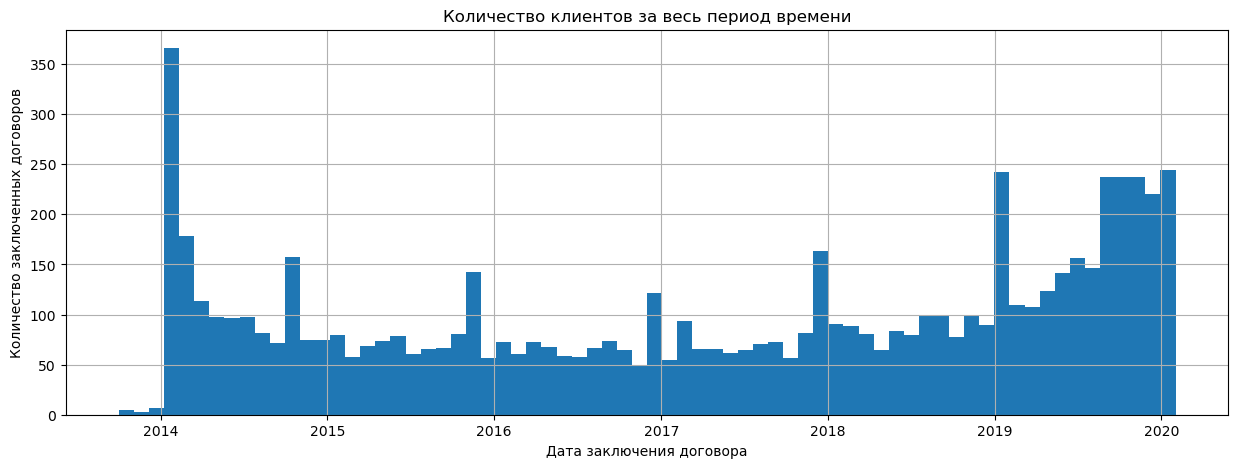

In [27]:
plt.figure(figsize=(15,5))
df_merge['BeginDate'].hist(bins = 70)
plt.ylabel('Количество заключенных договоров')
plt.xlabel('Дата заключения договора')
plt.title('Количество клиентов за весь период времени')
plt.show()

Посмотрим на количество ушедших клиентов по годам:

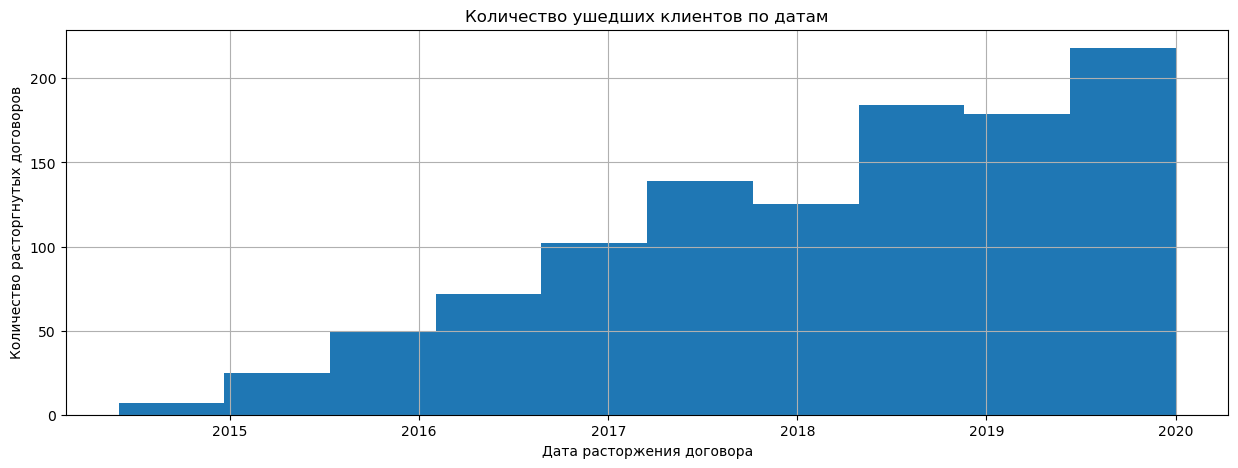

In [28]:
df_merge_filtr = df_merge.query('EndDate!="2020-02-01"')
plt.figure(figsize=(15,5))
df_merge_filtr['EndDate'].hist()
plt.ylabel('Количество расторгнутых договоров')
plt.xlabel('Дата расторжения договора')
plt.title('Количество ушедших клиентов по датам')
plt.show();

Видим, что с каждым годом все больше и больше клиентов рассторгало договор.

Далее поcтроим график количества дней пользования услугами оператора:

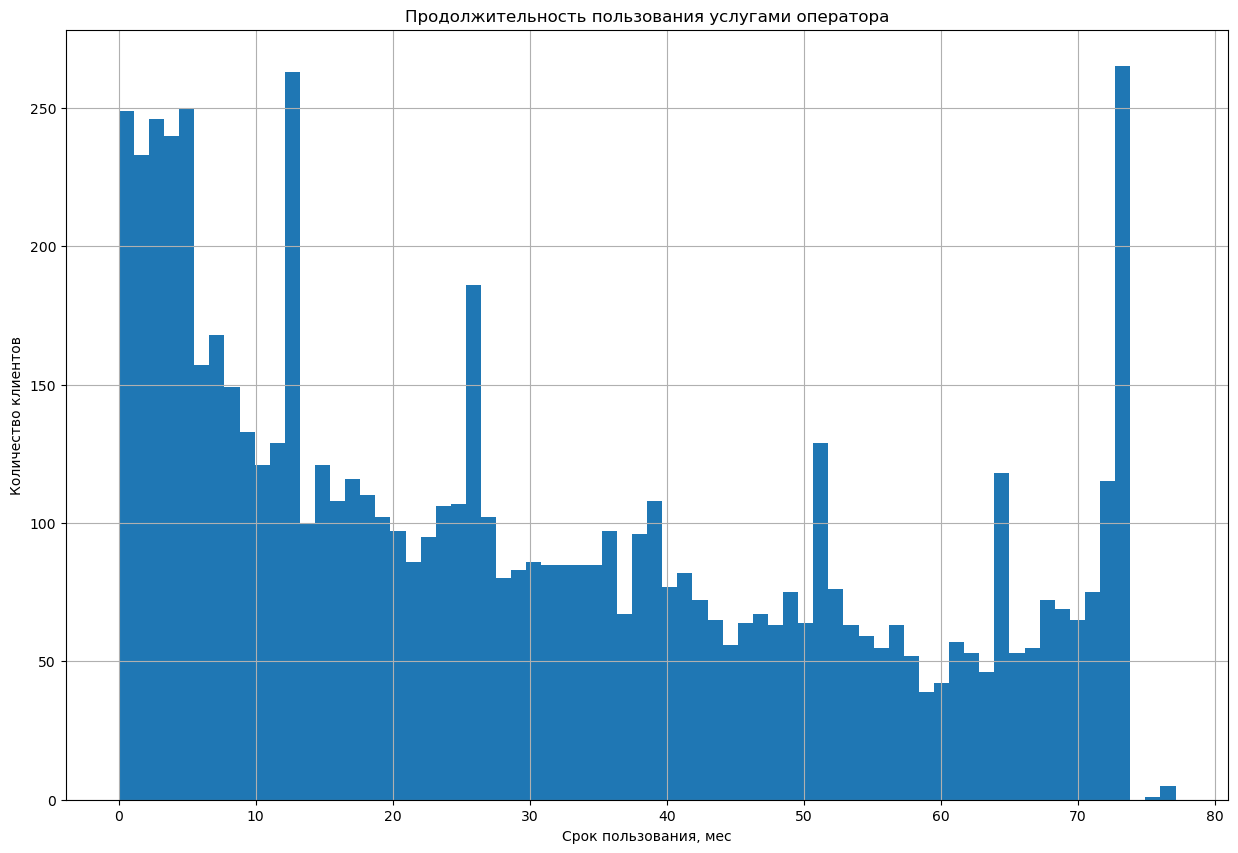

In [29]:
df_merge['PeriodMonth'] = df_merge['Period'] / 30
plt.figure(figsize=(15,10))
df_merge['PeriodMonth'].hist(bins=70)
plt.title(f'Продолжительность пользования услугами оператора')
plt.xlabel(f'Срок пользования, мес')
plt.ylabel('Количество клиентов')
plt.show()

Можем замтеить, что больше клиентов недолго пользовались услугами оператора. Всплеск в самом конце есть, потому что мы смотрим весь период, не исключив 2020-02-01.

Далее посмотрим графики, связанные с целевым признаком.

['Type', 'PaperlessBilling', 'PaymentMethod', 'Gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

['MonthlyCharges', 'TotalCharges', 'Period', 'PeriodMonth']


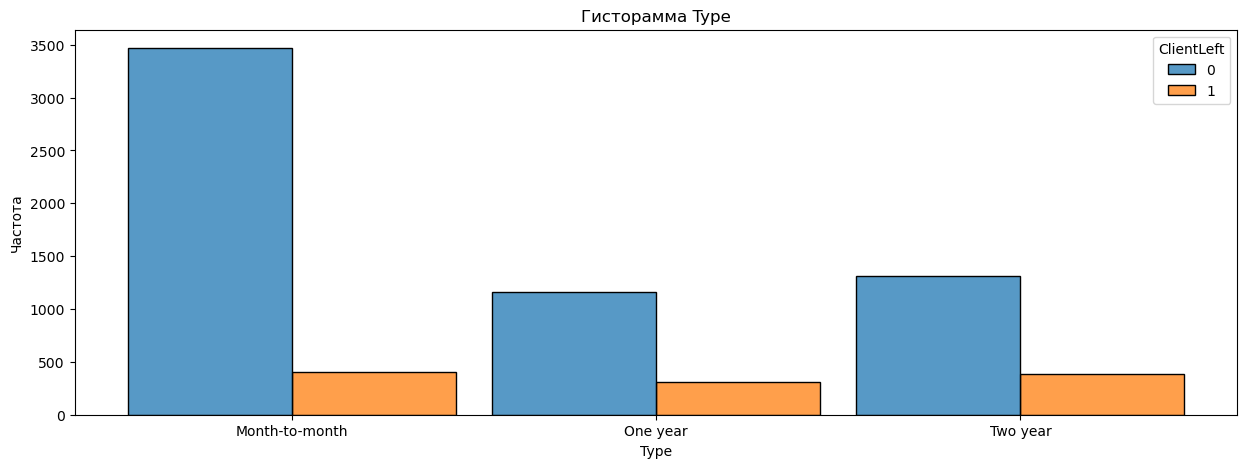

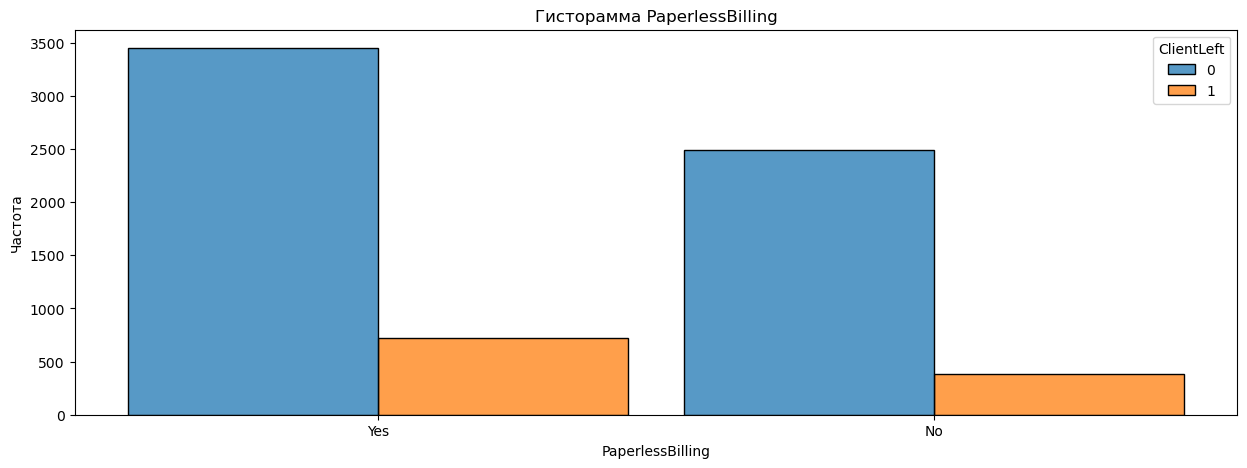

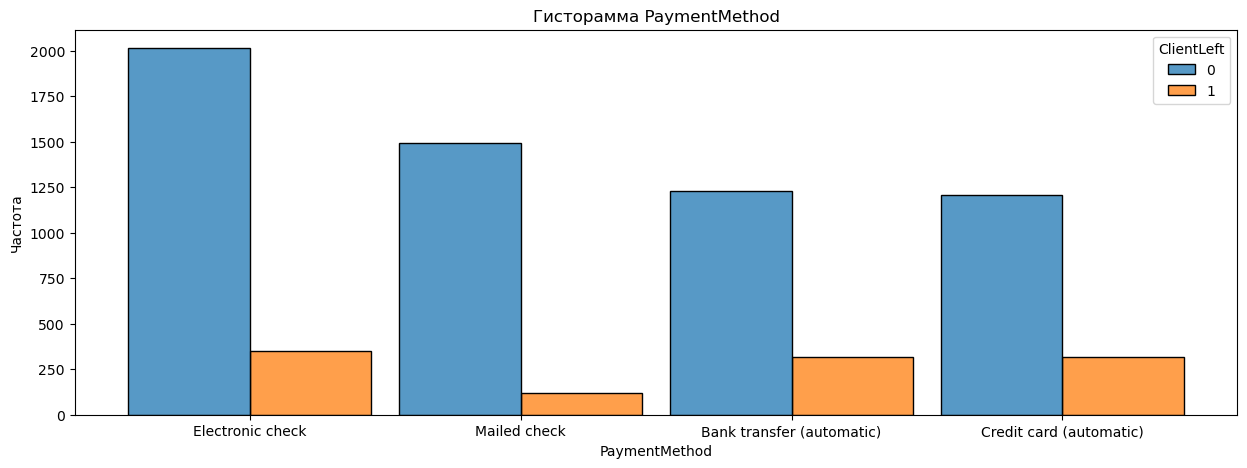

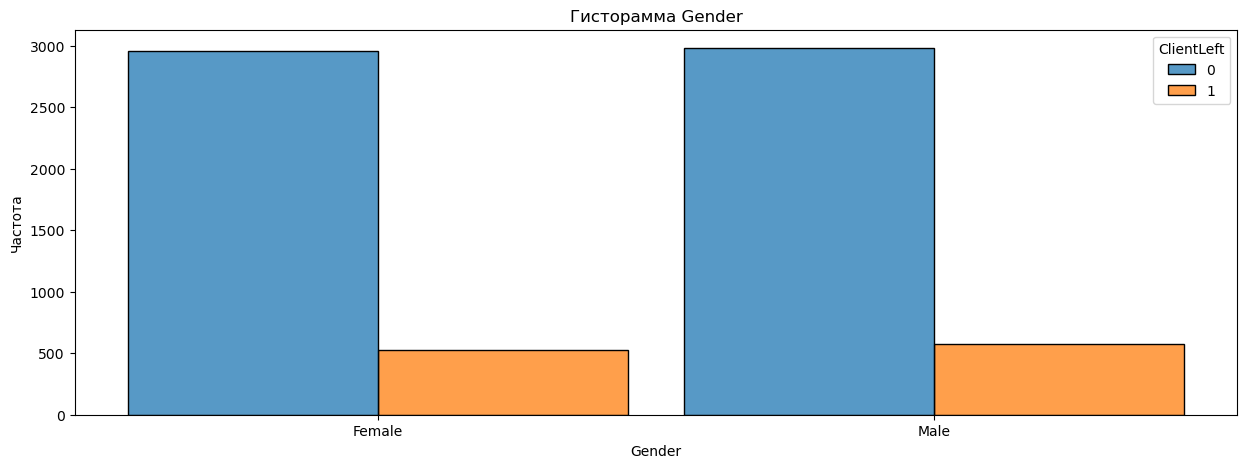

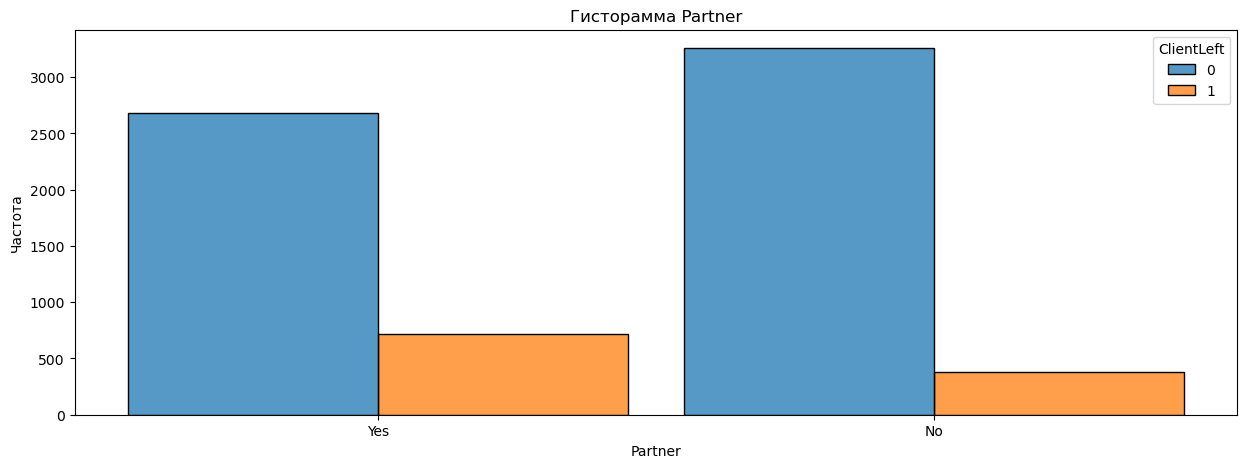

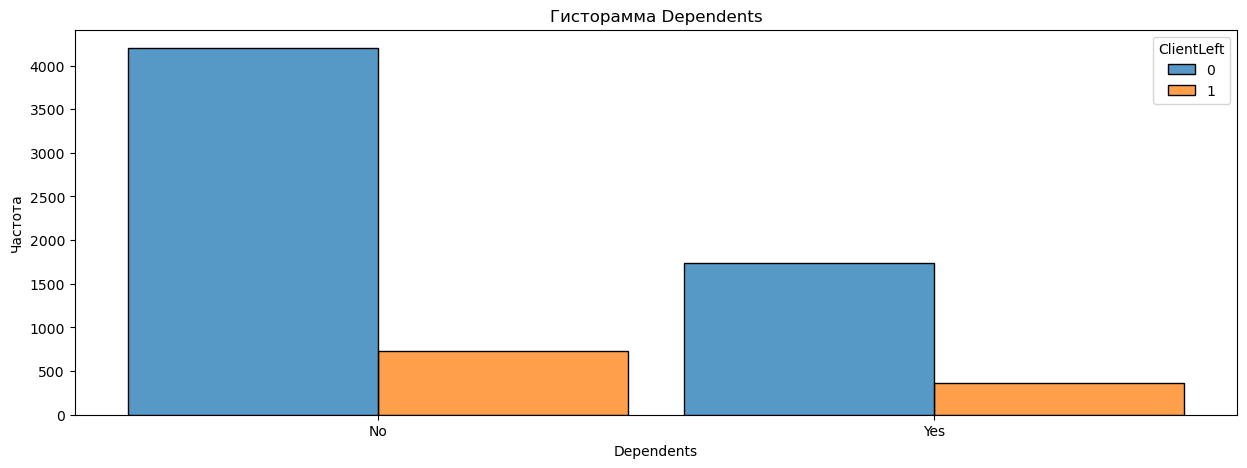

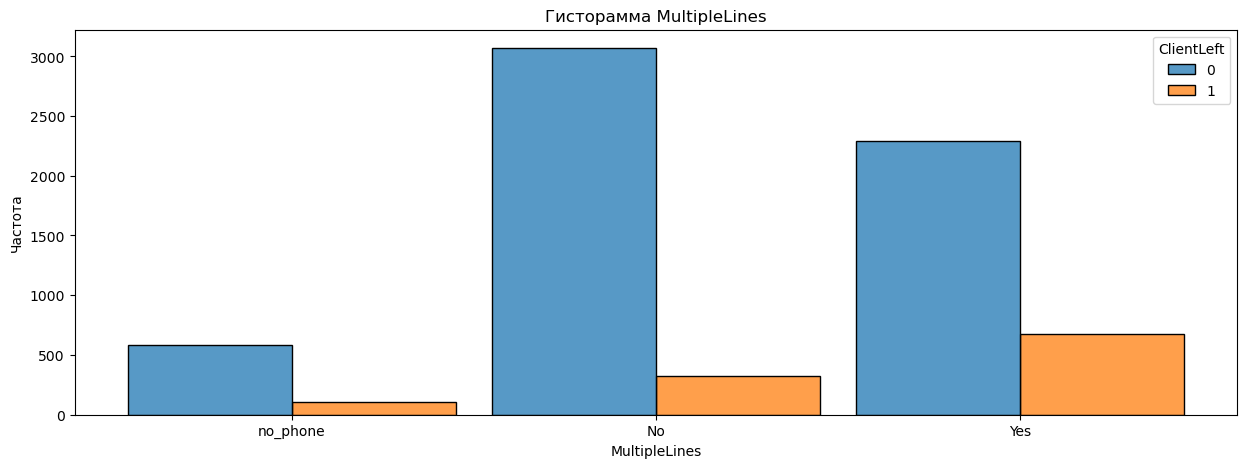

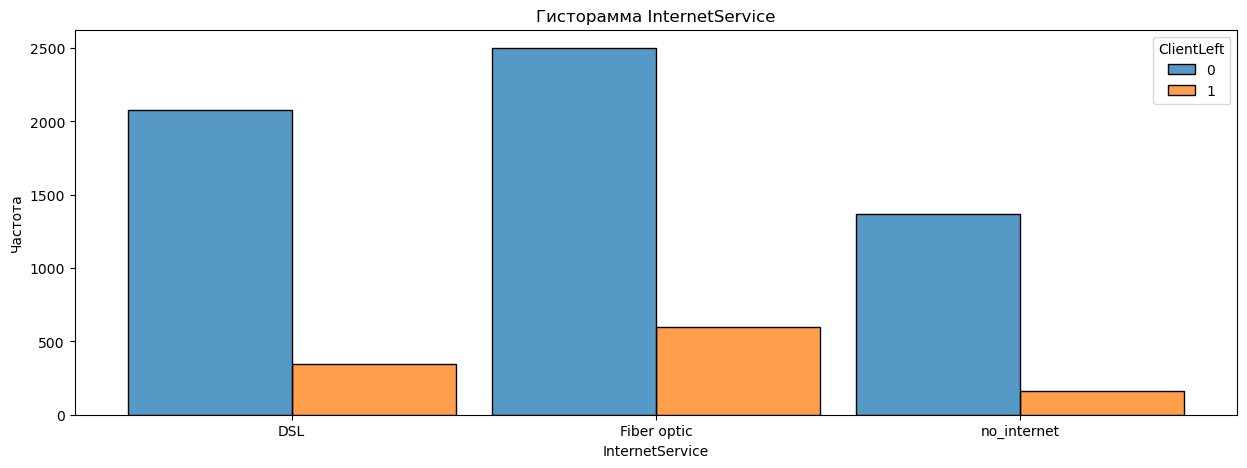

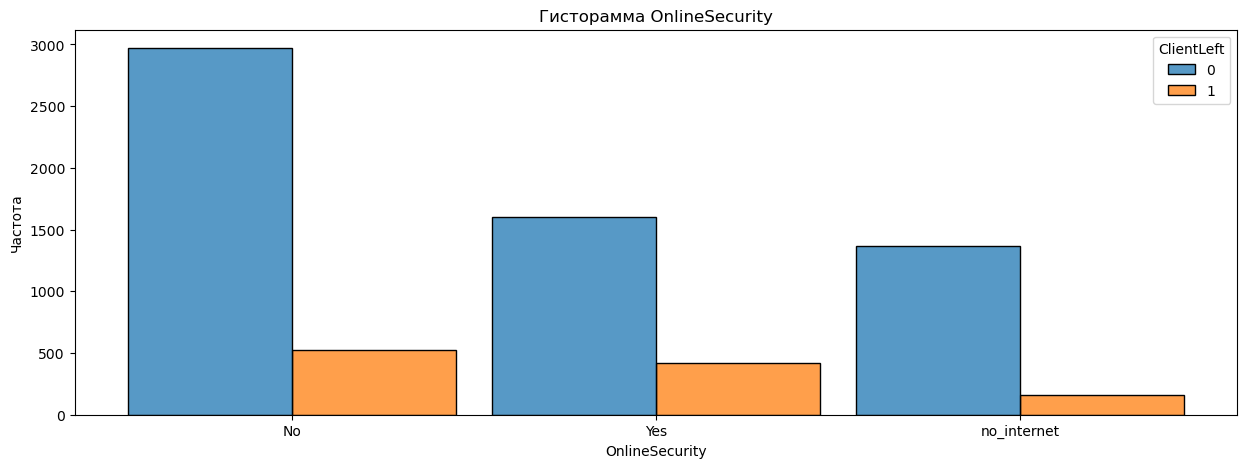

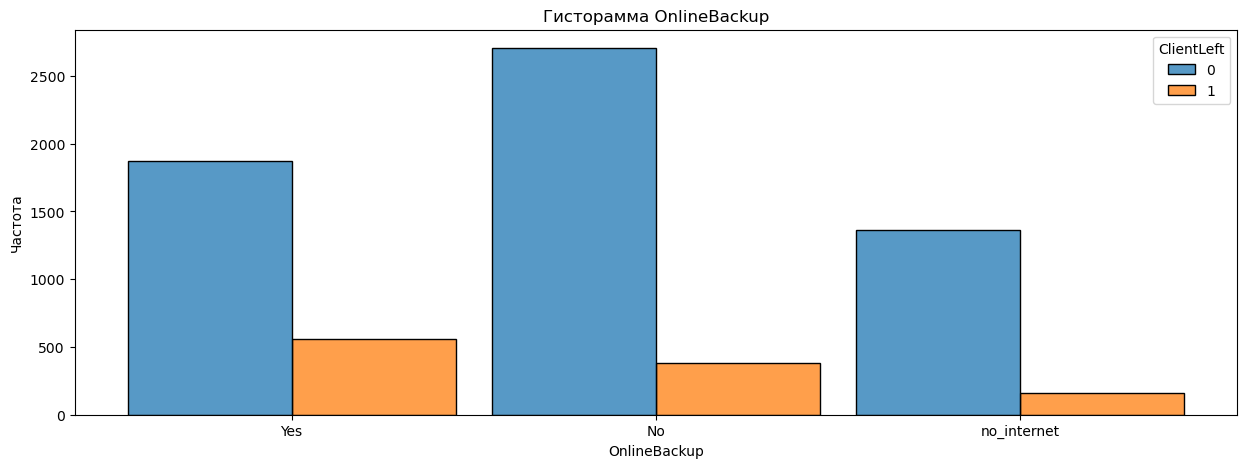

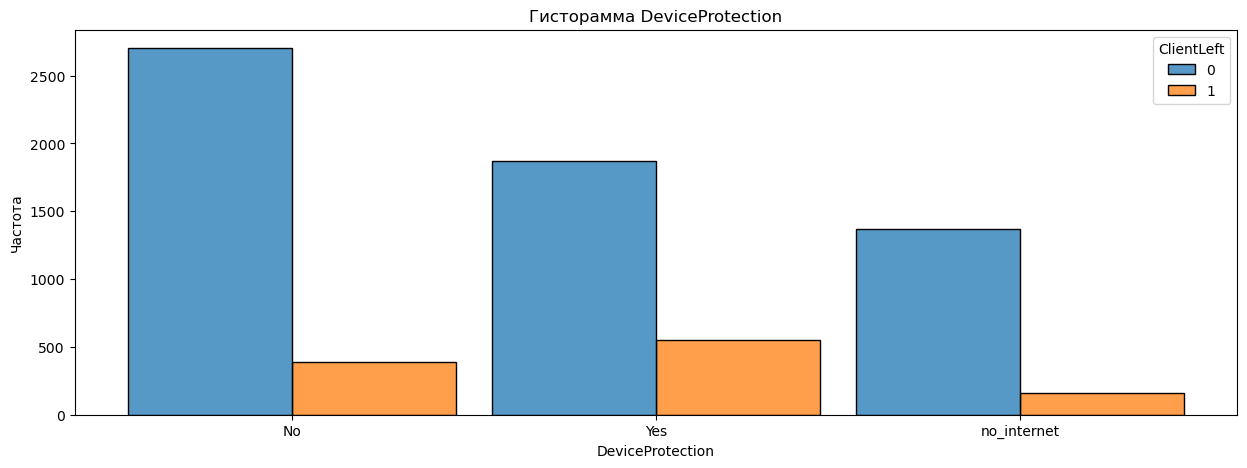

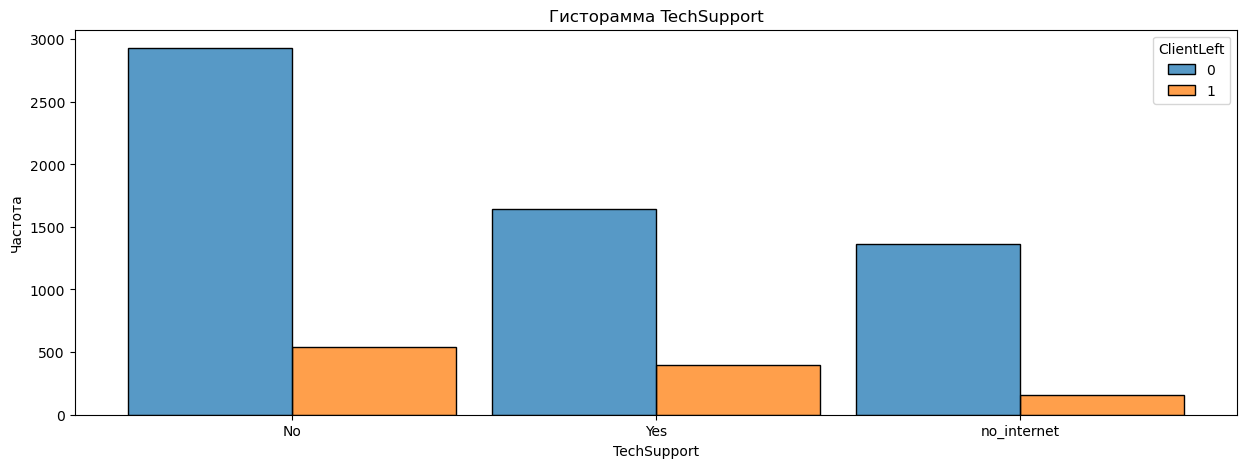

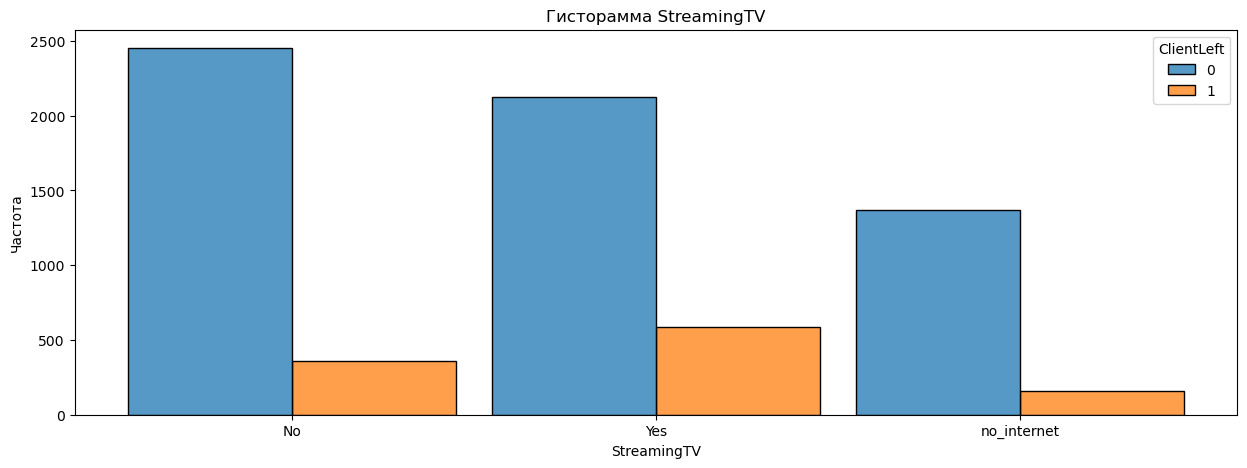

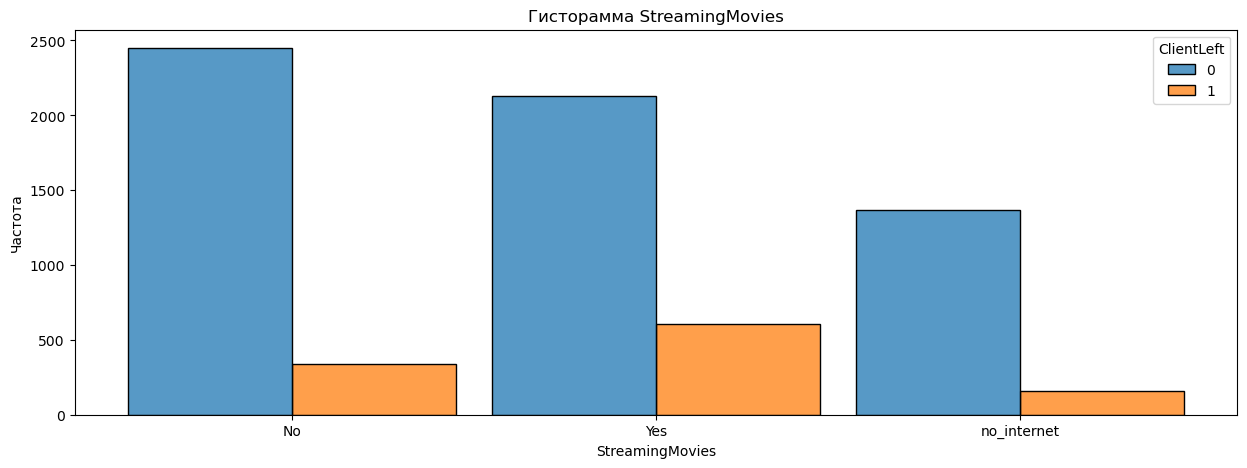

In [30]:
# создаздим два списка : один с категориальными переменными, 
# другой для численных.
c_list = []
num_list = []

df_merge = df_merge.set_index('CustomerID')

# наполним их соответсвующими признаками
for i in df_merge.columns:
    if df_merge[i].dtype == 'object':
        c_list.append(i)
    elif df_merge[i].dtype == 'float64':
        num_list.append(i)
print(c_list, num_list, sep='\n\n')


# построим гистрограммы для категориальных признаков
for i in c_list:
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_merge,x=i, hue='ClientLeft', multiple="dodge", shrink=.9)
    plt.ylabel('Частота')
    plt.xlabel(i)
    plt.title(f'Гисторамма {i}')
    plt.show()

По категориальным признакам особой взаимосвязи не наблюдается, но посмотрим позже подробнее на корреляции.

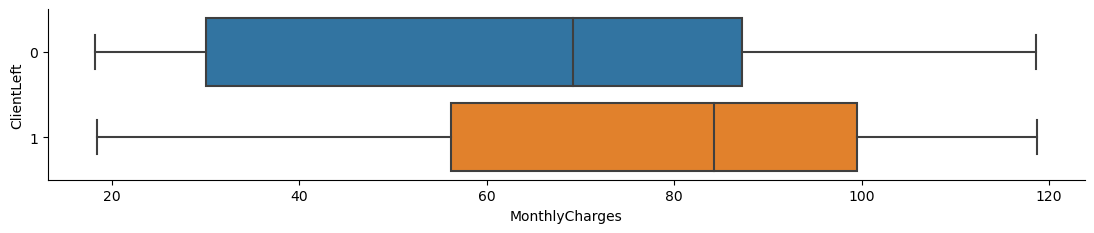

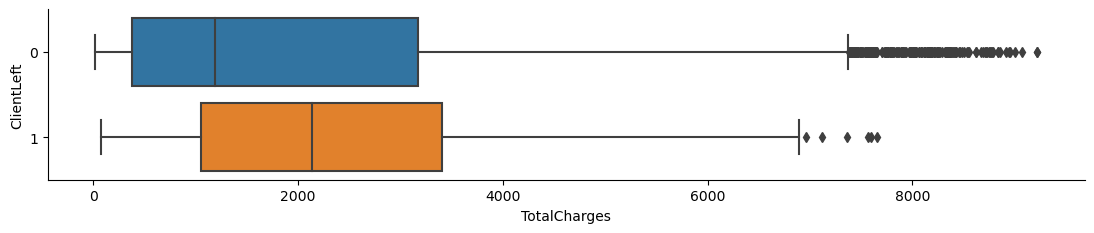

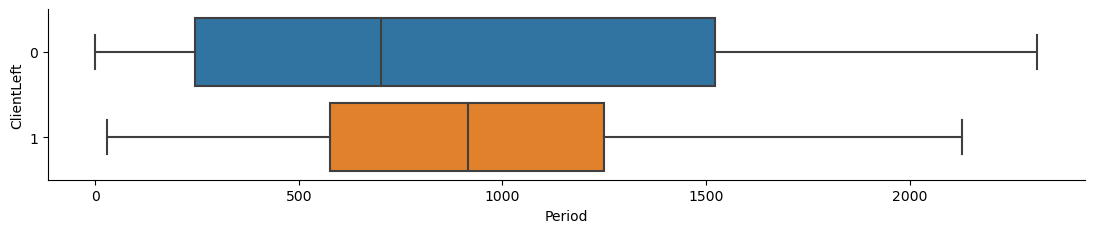

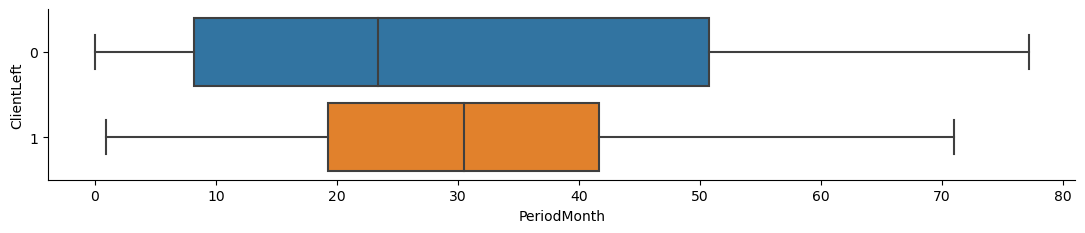

In [31]:
# посмотрим  для численных признаков
# for j in num_list:    
    # k = sns.catplot(y='CleintLeft', x=j, kind="box", data=df_merge, orient='h')
    # k.fig.set_figwidth(12)
    # k.fig.set_figheight(2)
    # plt.show();
    
for i in num_list:
    j = sns.catplot(data=df_merge,x=i, y='ClientLeft', kind='box', orient='h')
    j.fig.set_figwidth(12)
    j.fig.set_figheight(2)
    plt.show()

Можем заметить, что у ушедших клиентов месячные расходы выше, чем у оставшихся, однако total расходы выше у оставшихся клиентов.

### Анализ признаков на мультиколлинеарность

In [32]:
phik_overview = df_merge.phik_matrix()

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'ClientLeft', 'Period', 'PeriodMonth']


In [33]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'ClientLeft', 'Period']
phik_overview = df_merge.phik_matrix(interval_cols = interval_cols)

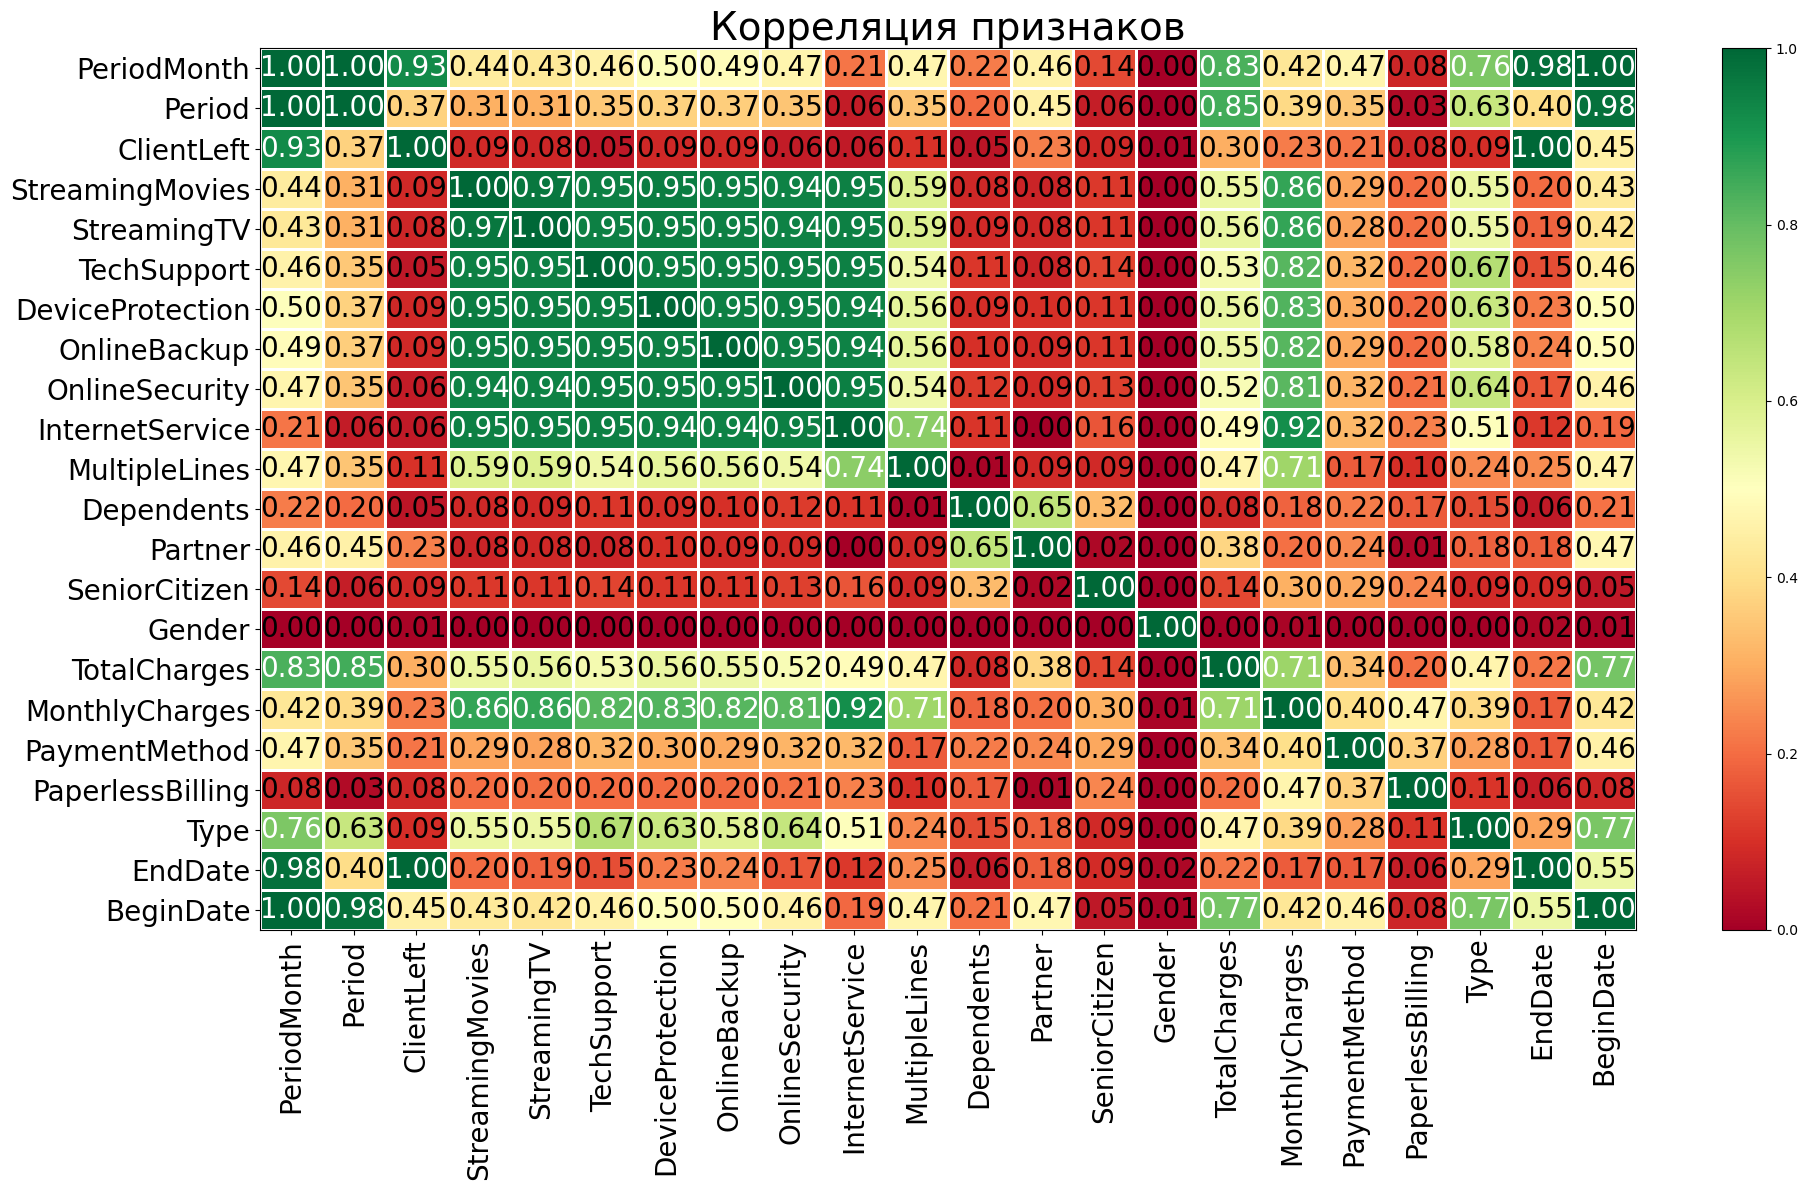

In [34]:
plot_correlation_matrix(phik_overview.values, 
                       x_labels = phik_overview.columns,
                       y_labels = phik_overview.index,
                       vmin = 0,
                       vmax = 1,
                       fontsize_factor = 2,
                       figsize = (20, 12),
                       title='Корреляция признаков')
plt.show();

На матрице заметна высокая корреляция для следующих столбцов:
- между TotalCharges и MonthlyCharges, Period;
- между InternetService и MonthlyCharges;
- между MonthlyCharges и почти всеми столбцами (помимо столбцов из таблицы Personal.

Что касается столбцов BeginDate и EndDate - их мы удалим, поскольку на основе их был создан новый признак Period.

У целевого признака ClientLeft присутсвует корелляция с Period, Partner, TotalCharges, MonthlyCharges, PaymentMethod, поэтому в последующих действиях оставим эти столбцы и пару признаков из выборок df_internet и df_phone, например InternetService и MultipleLines. 

### Проверка на дисбаланс классов

In [35]:
print(df_merge['ClientLeft'].value_counts(), '\n\n', 
      'Процент действующих клиентов: ',
      round(100 - sum(df_merge['ClientLeft']/len(df_merge['ClientLeft']) * 100), 2), '%','\n', 
      'Процент ушедших клиентов: ',
      round(sum(df_merge['ClientLeft']/len(df_merge['ClientLeft']) * 100), 2), '%', '\n')

0    5942
1    1101
Name: ClientLeft, dtype: int64 

 Процент действующих клиентов:  84.37 % 
 Процент ушедших клиентов:  15.63 % 



Дисбаланс классов очевиден, но чувствительность метрики к нему отсутсвует, поэтому балансировать данные нет необходимости.

### Вывод

1. Сделали визуализацию признаков.
2. Провели анализ признаков на мультиколлинеарность с помощью матрицы корреляции, выявили важные и неважные признаки.
3. Проверили дисбаланс классов - 84.37 % / 15.63 %.

## Подготовка данных к обучению

### Разбиние выборки

In [36]:
# удалим ненужные на основе анализа столбцы, путем оставления нужных
df_final = df_merge[['Period', 'Partner', 'TotalCharges', 
                     'MonthlyCharges', 'PaymentMethod', 'Type', 
                     'ClientLeft', 'InternetService', 'MultipleLines']]

# разобьем датафрейм на 2 выборки
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('ClientLeft', axis = 1),
                                                    df_final['ClientLeft'],
                                                    test_size = 0.25,
                                                    random_state = 280823,
                                                    stratify = df_final['ClientLeft'])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5282, 8), (5282,), (1761, 8), (1761,))

### Кодирование признаков

In [37]:
ohe_features = ['Partner', 'PaymentMethod', 'Type', 'InternetService', 'MultipleLines']
num_features = ['Period', 'TotalCharges', 'MonthlyCharges']

# применим ohe
X_train_ohe = X_train.join(pd.get_dummies(X_train[ohe_features], drop_first=True))
X_test_ohe = X_test.join(pd.get_dummies(X_test[ohe_features], drop_first=True))

# удалим прошлые признаки
X_train_ohe.drop(ohe_features, axis = 1, inplace = True)
X_test_ohe.drop(ohe_features, axis = 1, inplace = True)

display(X_test_ohe.head(), X_train_ohe.head())

,Period,TotalCharges,MonthlyCharges,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_no_internet,MultipleLines_Yes,MultipleLines_no_phone
CustomerID,,,,,,,,,,,,,
8884-ADFVN,306.0,1111.26,101.95,1,0,1,0,0,0,1,0,1,0
1431-CYWMH,671.0,431.67,19.05,1,0,0,0,0,0,0,1,0,0
8591-TKMZH,1798.0,6554.90,111.10,1,0,0,1,0,1,1,0,1,0
6982-SSHFK,153.0,222.00,44.40,0,0,0,1,0,0,0,0,0,0
1285-OKIPP,62.0,174.18,79.90,0,0,1,0,0,0,1,0,0,0


,Period,TotalCharges,MonthlyCharges,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_no_internet,MultipleLines_Yes,MultipleLines_no_phone
CustomerID,,,,,,,,,,,,,
9220-CXRSC,2102.0,4236.60,61.40,1,1,0,0,0,1,0,0,1,0
1029-QFBEN,153.0,102.64,19.55,0,0,0,1,0,0,0,1,0,0
0886-QGENL,426.0,1545.08,101.25,1,0,1,0,0,0,1,0,0,0
4423-JWZJN,1949.0,5776.00,90.25,1,1,0,0,1,0,1,0,1,0
3179-GBRWV,641.0,1391.23,64.95,1,0,0,0,0,0,0,0,0,0


### Вывод

1. Оставили необходимые признаки.
2. Разбили данные на 2 выборки с test_size = 0.25.
3. Закодировали качественные признаки.

## Обучение и исследование моделей

### LogisticRegression

In [38]:
parameters = {'lr__fit_intercept' : [True, False],
              'lr__penalty' : ['l1', 'l2'],
              'lr__solver' :['saga', 'liblinear', 'lbfgs'],
              'lr__C' : [0.01, 0.1, 1]}

ohe_pipe = Pipeline([('imputer', SimpleImputer(missing_values='?',
                                               strategy='most_frequent')),
                     ('ohe', OneHotEncoder(sparse=False, 
                                           handle_unknown='ignore'))])

num_pipe = Pipeline([('scaler', StandardScaler())])

transformer = ColumnTransformer(transformers=[('cat', ohe_pipe, ohe_features),
                                              ('num', num_pipe, num_features)],
                                remainder='passthrough')

pipe = Pipeline([('transformer', transformer),
               ('lr', LogisticRegression(random_state=280823))])

lr = GridSearchCV(estimator = pipe,
                  param_grid = parameters,
                  scoring = 'roc_auc',
                  cv=5)

lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(missing_values='?',
                                                                                                        strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                          

In [39]:
# лучшая оценка LogisticRegression
lr_best_score = lr.best_score_
lr_best_score

0.7560576686646504

### RandomForestClassifier

In [40]:
parameters = {'rfc__n_estimators' : [25, 50, 100, 150],
              'rfc__criterion' : ['gini', 'entropy'],
              'rfc__max_depth':[5, 10, 15, 20]}   

steps = [('rfc', RandomForestClassifier(random_state=280823, n_jobs=-1))]

pipe = Pipeline(steps)

rfc = GridSearchCV(estimator = pipe,
                   param_grid = parameters,
                   cv=5)

rfc.fit(X_train_ohe, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=280823))]),
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [5, 10, 15, 20],
                         'rfc__n_estimators': [25, 50, 100, 150]})

In [41]:
rfc_best_score = rfc.best_score_
rfc_best_score

0.8629296751813309

### CatBoostClassifier

In [42]:
%%time

parameters = {'cbc__depth':[1, 2, 3, 6, 4, 5, 7, 8, 9, 10],
          'cbc__iterations':[100, 250],
          'cbc__learning_rate':[0.001, 0.01, 0.1],
          'cbc__loss_function': ['Logloss', 'CrossEntropy']}

steps = [('cbc', CatBoostClassifier(random_state=280823, cat_features=ohe_features, verbose=False))]

pipe = Pipeline(steps)

cbc = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv=5)
    
model_cbc = cbc.fit(X_train, y_train)

Wall time: 21min


In [45]:
model_cbc_best_score = model_cbc.best_score_
model_cbc_best_score

0.8915512501892456

### Сравнение моделей

Составим небольшую таблицу для наглядности лучших score трех моделей:

In [46]:
scores = [[lr_best_score],
         [rfc_best_score],
         [model_cbc_best_score]]

results = pd.DataFrame(scores, columns=['BestScore'], 
                       index=['LogisticRegression', 'RandomForestClassifier', 'CatBoostClassifier'])
results

,BestScore
LogisticRegression,0.756058
RandomForestClassifier,0.862930
CatBoostClassifier,0.891551


Наилучшую оценку показала модель CatBoostClassifier.

### Вывод

Протестировали с использованием Pipeline и GridSearchCV три модели, наилучшую оценку равную 0.898648 показала модель CatBoostClassifier.

## Тестирование наилучшей модели

In [47]:
test_cbс_score = roc_auc_score(y_test, model_cbc.predict_proba(X_test)[:, 1])
print('Оценка на тесте:', test_cbс_score)

Оценка на тесте: 0.9012333292548634


In [48]:
# для матрицы ошибок
predicted_cbc = model_cbc.predict(X_test)
predicted_cbc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Достигли оценки > 0.85 - условие проекта выполнено.

### Анализ важности признаков

In [49]:
feature_importances = model_cbc.best_estimator_._final_estimator.feature_importances_
feature_importances

array([51.48892208,  3.50698994,  9.45787689,  9.36539891,  5.17641208,
       12.31876674,  3.0268579 ,  5.65877546])

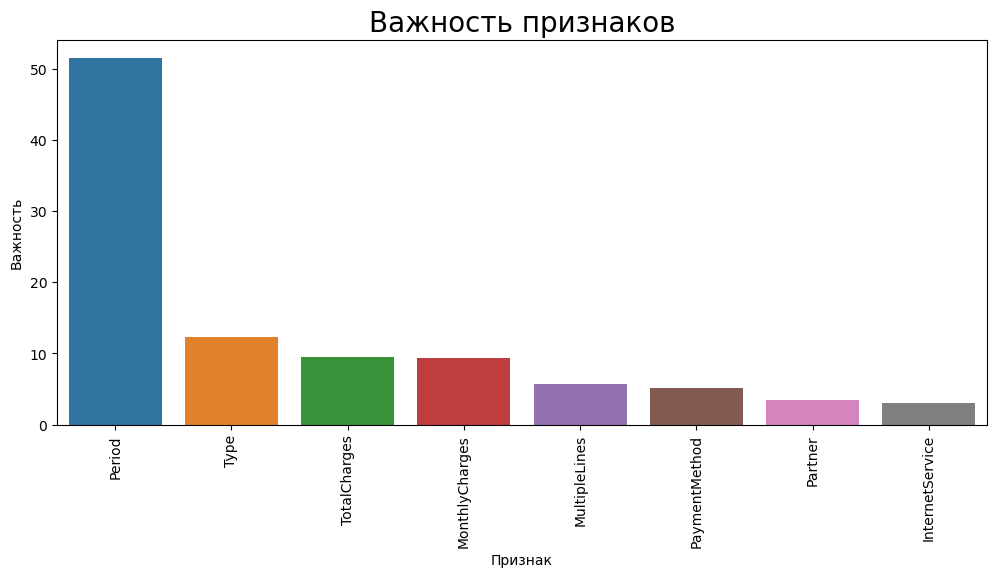

In [50]:
imp = pd.DataFrame(data={'Attribute': X_train.columns,
                         'Importance': feature_importances})
#_final_estimator.feature_importances
imp = imp.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (12,5))
sns.barplot(x=imp['Attribute'], y=imp['Importance'])
plt.title('Важность признаков', size=20)
plt.xticks(rotation='vertical')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show();

Самым важным признаком оказался признак Period.

### Матрица ошибок

In [51]:
confusion_matrix(y_test, predicted_cbc)

array([[1465,   21],
       [ 163,  112]], dtype=int64)

По главной диагонали выстроены правильные прогнозы; по второстепенной - ошибочные варианты.

### ROC-кривая итоговой модели

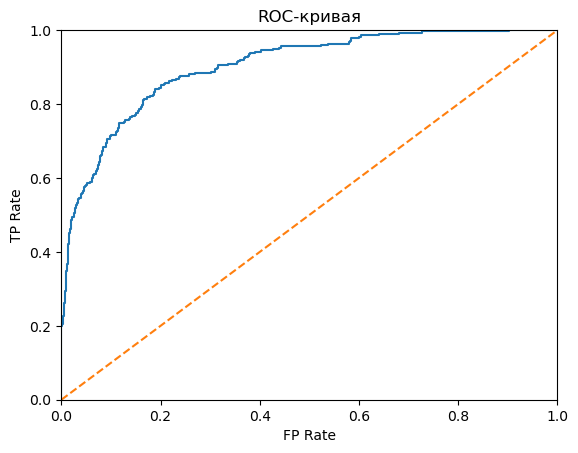

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, model_cbc.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# < примените функции plt.xlim() и plt.ylim(), чтобы
#   установить границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < примените функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

# < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC-кривая')

plt.show() 

Чтобы выявить, как сильно наша модель отличается от случайной, посчитали площадь под ROC-кривой — AUC-ROC, подсчитанной ранее 0.9034552795791018. Это метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.

## Общий вывод

Проведено несколько этапов для решения задачи проекта - прогнозирования оттока клиентов опратора связи. 

Были выполнены следующий этапы:
1. Разведывательный анализ. На данном этапе осуществлялась загрузка данных и их преварительный анализ с помощью методов info() и describe().
2. Предобработка данных. На данном этапе выполнялась обработка данных, в результате которой данные стали готовы для обучения моделей (обработка пропусков, устранение аномалий и т. п.).
3. Исследовательский анализ данных / EDA. На данном этапе по обработанным данным был выполнен детальный анализ.
4. Подготовка данных к обучению. На данном этапе данные были разделены на train и test и применено кодирование категориальных признаков.
5. Обучение и исследование моделей. На данном этапе были выбраны 3 модели, для которых были подобраны гиперпараметры с помощью GridSearchCV и была выявлена лучшая модель CatBoostClassifier с наилучшим результатом метрики AUC-ROC =~ 0.898.
6. Тестирование наилучшей модели. На данном этапе рассчитали метрику для лучшей модели на тестовой выборке AUC-ROC =~ 0.903, провели анализ важности признаков, построили матрицу ошибок и построили ROC-кривую для итоговой модели.

В рзультате этих этапов мы на модли CatBoostClassifier получили AUC-ROC =~ 0.9, что удовлетворяет главному критерию проекта ( > 0.85).

# Отчет по решению

## Выполненные пункты плана

Были **выполнены все пункты плана**:
1. Разведывательный анализ. 
2. Предобработка данных.
3. Исследовательский анализ данных / EDA.
4. Подготовка данных к обучению.
5. Обучение и исследование моделей.
6. Тестирование наилучшей модели.

**Разведывательный анализ**
1. Данные загружены корректно.
2. Рассмотрен каждый датафрейм.
3. Выявлен разный стиль написания заголовков - необходимо далее привести к единому виду.
4. Столбец **Senior Citizen** не соотвествуют нужному типу данных - необходимо привести к нужному.
5. Пропуски отсутсвуют.

<br>

**Предобработка данных**
<ol>
    <li>4 таблицы объединены в одну;
    <li>Названия столбцов приведены к единому стилю;
    <li>Некоторые столбцы приведены к правильному типу данных.
    <li>Устранены пропуски.
    <li>Аномалии не найдены.
    <li>Дубликаты не найдены.
    <li>Добавлены новые столбцы "ClientLeft" и "Period".
    <li>В столбце EndDate значения 'No' заменены на дату актуальной информации - 1 февраля 2020.
</ol>

<br>

**Исследовательский анализ данных / EDA**
1. Сделали визуализацию признаков.
2. Провели анализ признаков на мультиколлинеарность с помощью матрицы корреляции, выявили важные и неважные признаки.
3. Проверили дисбаланс классов - 84.37 % / 15.63 %.

<br>

**Подготовка данных к обучению**
1. Оставили необходимые признаки.
2. Разбили данные на 2 выборки с test_size = 0.25.
3. Закодировали качественные признаки.

<br>

**Обучение и исследование моделей**

Протестировали с использованием Pipeline и GridSearchCV три модели, наилучшую оценку равную 0.898648 показала модель CatBoostClassifier.

<br>

**Тестирование наилучшей модели**
1. Оценка на тесте: 0.901.
2. Самым важным признаком оказался признак Period.
3. Матрица ошшибок. По главной диагонали выстроены правильные прогнозы; по второстепенной - ошибочные варианты.
4. Чтобы выявить, как сильно наша модель отличается от случайной, посчитали площадь под ROC-кривой — AUC-ROC, подсчитанной ранее 0.901. Это метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.

## Трудности при выполнении и их преодоление

На этапе разведывательного анализа проблем не возникло.

На этапе предобработки данных возникла следующая проблема: 

На этапе исследовательского анализа данных / EDA возникла следующая проблема:
- Были ошибочно определены признаки к анализу, из-за полного НЕвключения двух выборок в итоговый датафрейм. Преодоление: добавила по два признака из двух отстутсвующих ранее выборок.

На этапе подготовки данных к обучению проблем не возникло.

На этапе обучения и исследования моделей возникла следующая проблема:
- При обучении линейной регрессии ошибочно закодировала не только численные признаки, но еще и категориальные. Преодоление: использование remainder='passtrough'.
- Была ошибочно использована балансировка. Преодоление: убран параметр class_weight='balanced'.
- Знакомство с пайплайнами было не совсем легким.

На этапе тестирование наилучшей модели и ее анализа проблем не возникло.

## Ключевые шаги в решении задачи 

**Шаг 1.** Данные:
- Загрузка и изучение;
- Предобработка;
- Исследование;
- Подготовка к обучению.

**Шаг 2.** Модели:
- Обучение с перебором гиперпараметров;
- Выбор лучшей на основе метрики.

**Шаг 3.** Лучшая модель:
- Тестирование модели на тестовой выборке;
- Анализ важности признаков;
- Матрица ошибок;
- ROC-кривая.

## Список признаков, учавствующих в обучение и описание их предобработки

**Список признаков**:
- Period;
- Partner;
- TotalCharges;
- MonthlyCharges;
- PaymentMethod;
- Type;
- ClientLeft;
- InternetService;
- MultipleLines.

**Описание предобработки**

1. **Period.** Создан новый столбец, означающий период действия контракта, на основе вычитания из конечной даты начальной.
2. **Partner.**  Без изменений.
3. **TotalCharges.**  Без изменений.
4. **MonthlyCharges.**  Без изменений.
5. **PaymentMethod.** Без изменений.
6. **Type.** Без изменений.
7. **ClientLeft.** Целевой признак. Создан на основе значений в EndDate: если 'No', то CleintLeft - '1'.
8. **MultipleLines.** Обнаружены пропуски, которые заполнили значением 'no_phone'.

Все численные признаки были отмасштабированы, а к качественным признакам был применен OHE для некоторых моделей.

## Итоговая модель с гиперпараметрами и значение метрики на тестовой выборке

В качестве итоговой модели выступает CatBoostClassifier, **гиперапараметры модели с наилучшей метрикой следующие**:

In [53]:
model_cbc.best_params_

{'cbc__depth': 6,
 'cbc__iterations': 250,
 'cbc__learning_rate': 0.1,
 'cbc__loss_function': 'Logloss'}

**Значение метрики на тестовой выборке = 0.901**

In [54]:
test_cbс_score = roc_auc_score(y_test, model_cbc.predict_proba(X_test)[:, 1])
print('Оценка на тесте:', test_cbс_score)

Оценка на тесте: 0.9012333292548634
